In [42]:
import pandas as pd
import numpy as np

df_original = pd.read_csv('insurance.csv')

# Visualizing the data


In [43]:
print(df_original.head())
print(df_original.describe())   


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


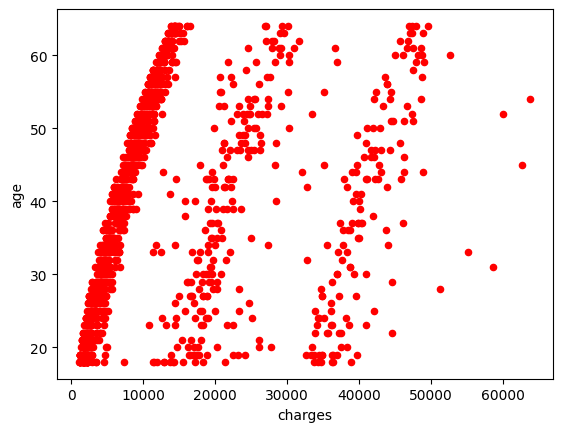

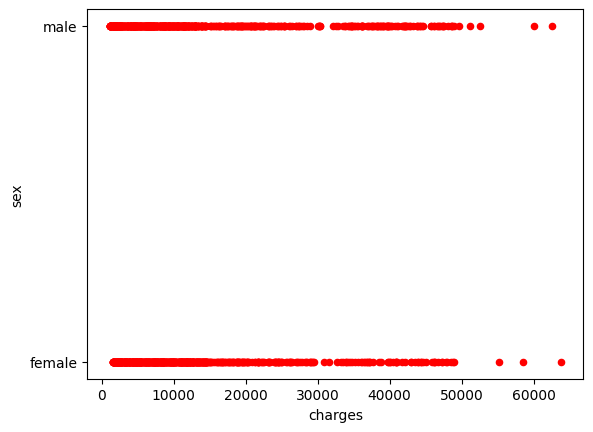

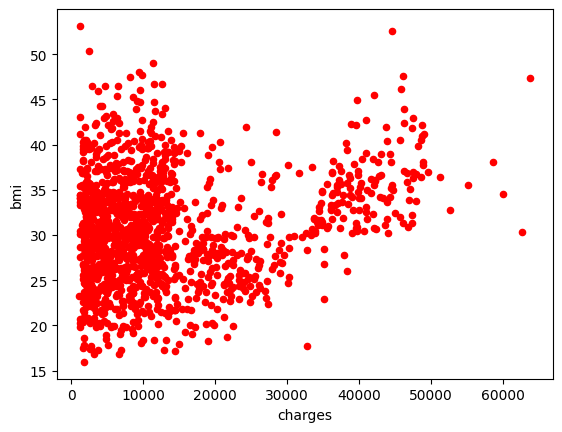

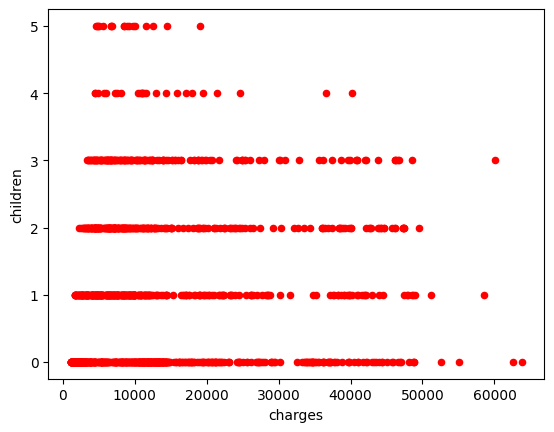

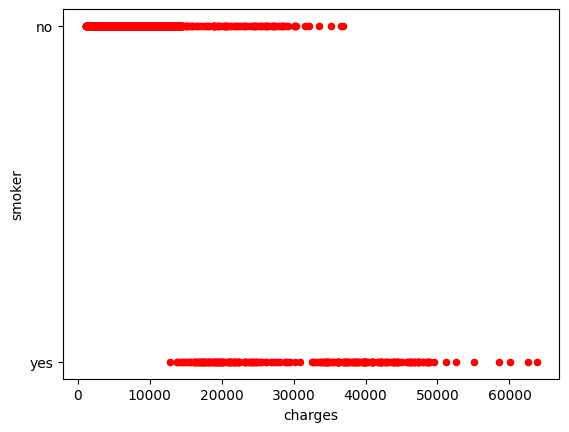

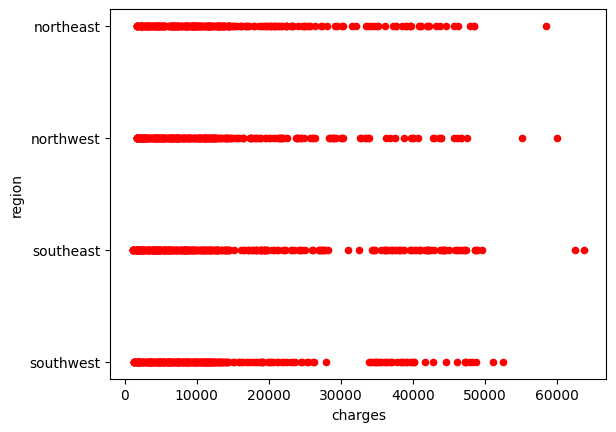

In [44]:

import matplotlib.pyplot as plt

columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
for column in columns:
    df_original.plot(x='charges', y=column, kind='scatter', color='red')
    plt.show()



# Encoding gender and region using one hot encoding

In [45]:
encoded_df = pd.get_dummies(df_original, columns=['region','smoker','sex'])

# Visualizing the data after encoding

In [46]:
encoded_df.head()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,19,27.900,0,16884.92400,False,False,False,True,False,True,True,False
1,18,33.770,1,1725.55230,False,False,True,False,True,False,False,True
2,28,33.000,3,4449.46200,False,False,True,False,True,False,False,True
3,33,22.705,0,21984.47061,False,True,False,False,True,False,False,True
4,32,28.880,0,3866.85520,False,True,False,False,True,False,False,True


# Scaling age, bmi, and children between 0 and 1
Note: it is not necessary to scale children since min max interval is 5 long, which is okay value.

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
encoded_df[['age', 'bmi', 'children']] = scaler.fit_transform(encoded_df[['age', 'bmi', 'children']])
encoded_df.head()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,0.021739,0.321227,0.0,16884.92400,False,False,False,True,False,True,True,False
1,0.000000,0.479150,0.2,1725.55230,False,False,True,False,True,False,False,True
2,0.217391,0.458434,0.6,4449.46200,False,False,True,False,True,False,False,True
3,0.326087,0.181464,0.0,21984.47061,False,True,False,False,True,False,False,True
4,0.304348,0.347592,0.0,3866.85520,False,True,False,False,True,False,False,True


# Visualizing the distirbution of the data to decide whether to eliminate outliers


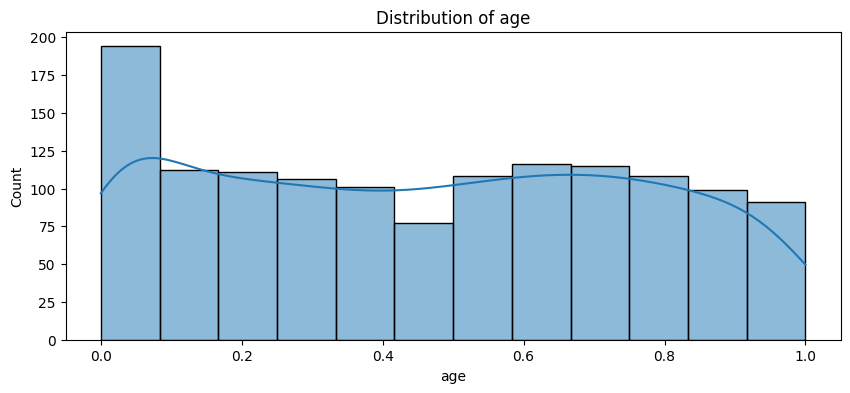

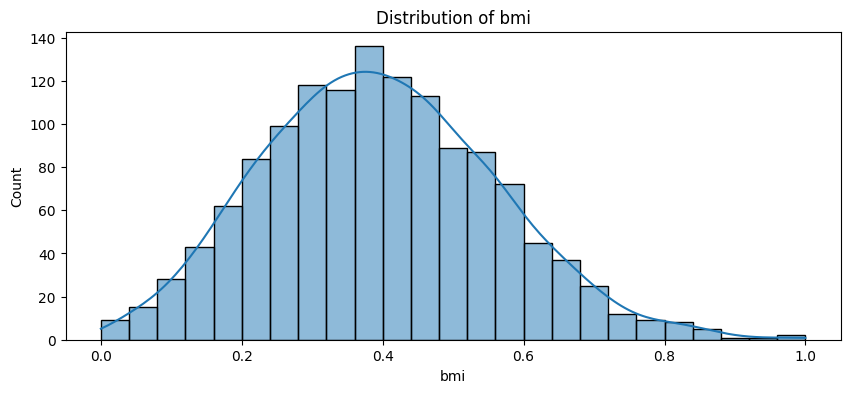

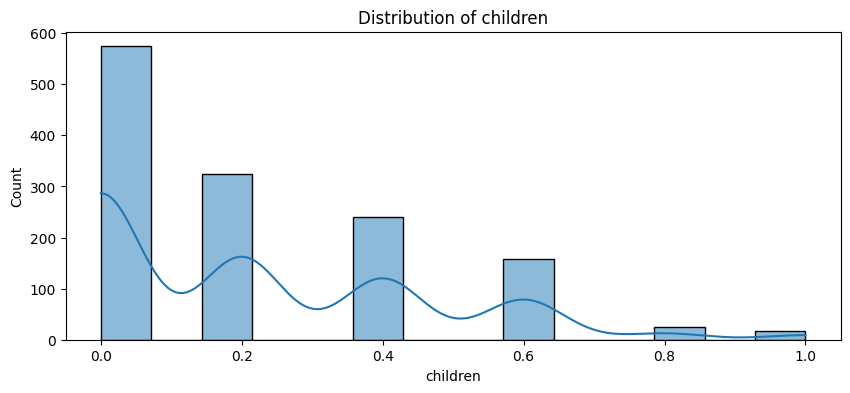

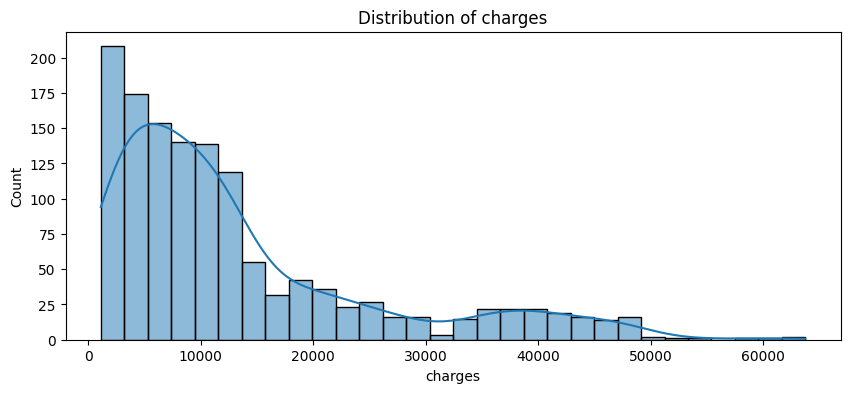

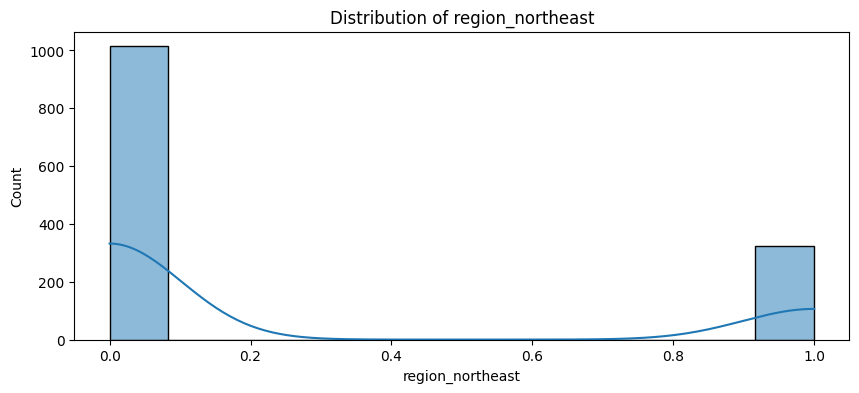

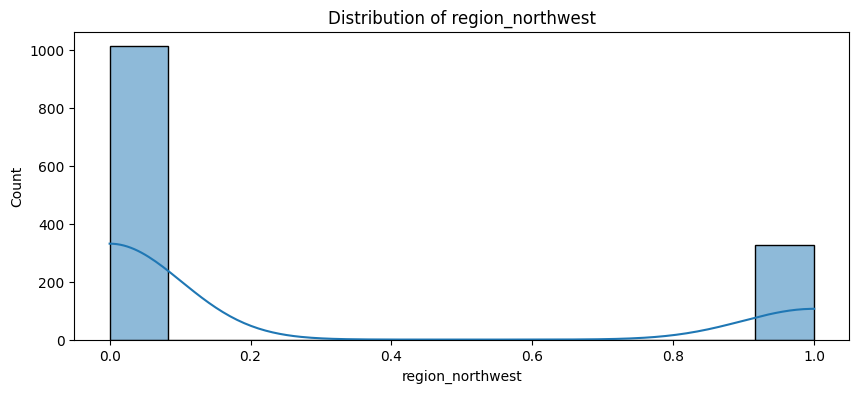

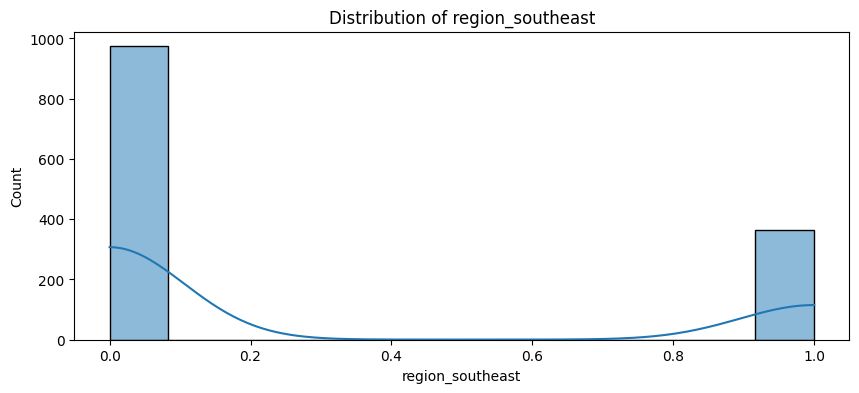

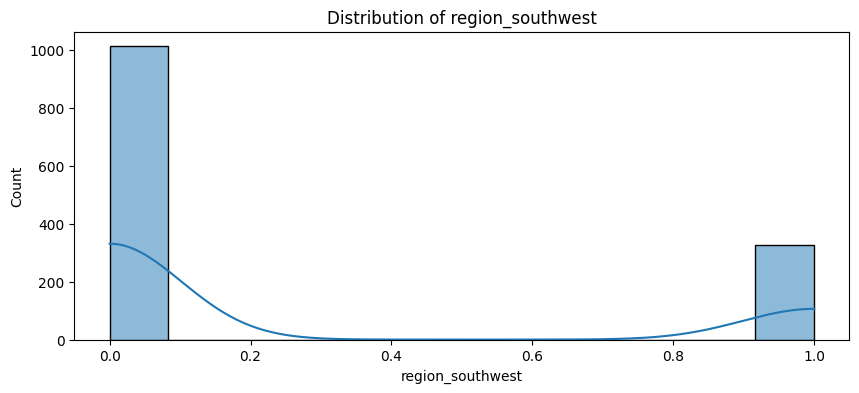

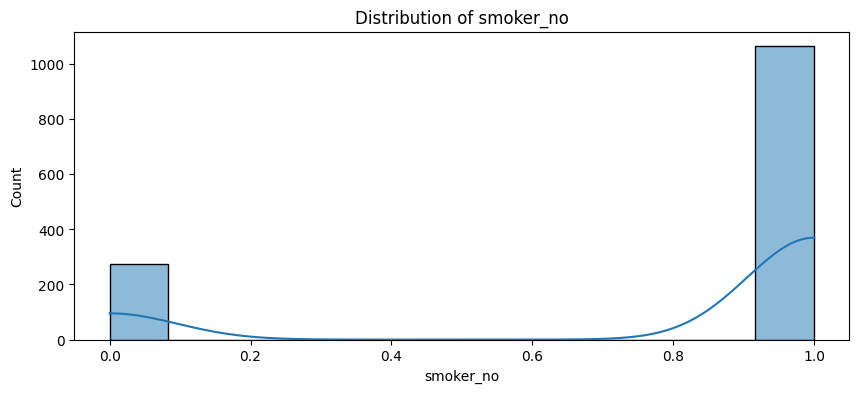

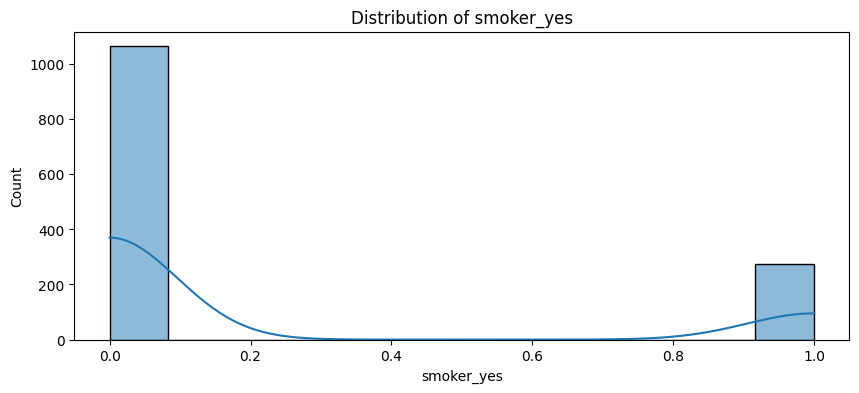

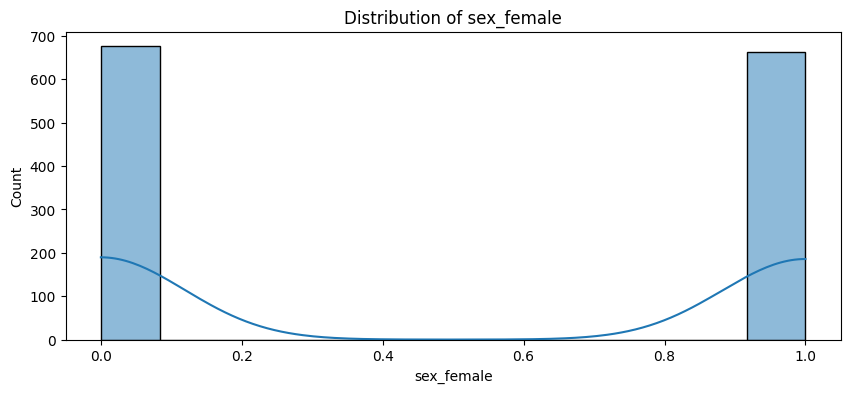

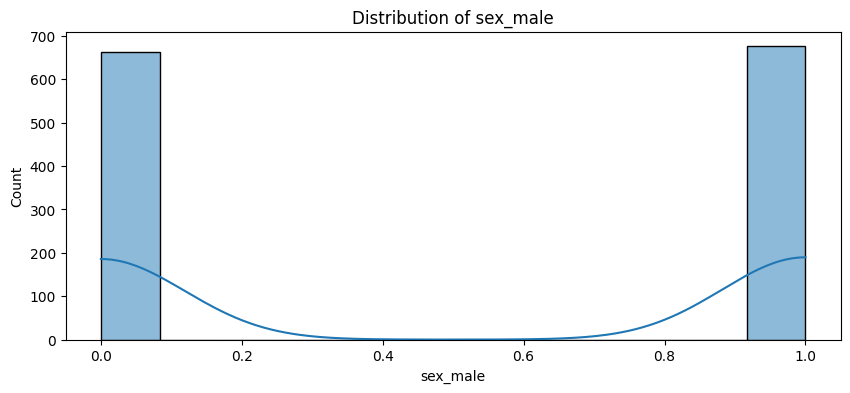

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming encoded_df is your DataFrame
for column in encoded_df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(encoded_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Deciding to keep all values, splitting the data and starting to implement the algorithms

# Implementing cost function

In [49]:
def compute_cost(X, y, w, b):
    m = len(y)
    J = (1/(2*m)) * np.sum(np.square(np.dot(X, w) + b - y))
    return J

# Implementing gradient function
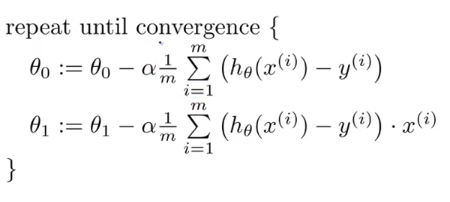

In [50]:
def compute_gradient(X, y, w, b):
    m = len(y)
    f_wb = np.dot(X, w) + b
    dw = (1/m) * np.dot(X.T, (f_wb - y))
    db = (1/m) * np.sum(f_wb - y)
    return dw, db

# Implementing gradient descent

In [51]:
def gradient_descent(X, y, w, b, learning_rate, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        dw, db = compute_gradient(X, y, w, b)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        cost_history[i] = compute_cost(X, y, w, b)
    return w, b, cost_history

# Splitting data to train and test with 90 to 10 ratio

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop('charges', axis=1), encoded_df['charges'], test_size=0.1, random_state=42)

# Utilizing graident descent to find optimum weights and bias and plotting Cost vs Iterations

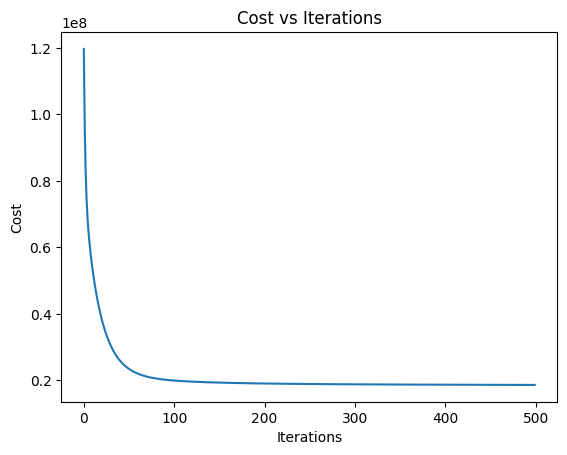

In [55]:
initial_w = np.zeros(X_train.shape[1])
initial_b = 0
learning_rate = 0.1
iterations = 500
final_w, final_b, cost_history = gradient_descent(X_train, y_train, initial_w, initial_b, learning_rate, iterations)
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()


In [64]:
from sklearn.metrics import mean_squared_error
y_pred = np.dot(X_test, final_w) + final_b
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
from sklearn.metrics import r2_score
print('R2 Score:', r2_score(y_test, y_pred))
print (final_w,"\n" ,final_b)


Mean Squared Error: 24478767.622785218
R2 Score: 0.8507295294163902
[11917.108114030334 9443.011030294629 2329.913648900828 1618.5356850094743
 1296.7860305651807 953.7156288470658 845.0845496810523 -9572.54656308172
 14286.668457184478 2401.686931623008 2312.434962479771] 
 4714.121894102782


In [62]:
encoded_df.corr()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
age,1.000000,0.109272,0.042469,0.299008,0.002475,-0.000407,-0.011642,0.010016,0.025019,-0.025019,0.020856,-0.020856
bmi,0.109272,1.000000,0.012759,0.198341,-0.138156,-0.135996,0.270025,-0.006205,-0.003750,0.003750,-0.046371,0.046371
children,0.042469,0.012759,1.000000,0.067998,-0.022808,0.024806,-0.023066,0.021914,-0.007673,0.007673,-0.017163,0.017163
charges,0.299008,0.198341,0.067998,1.000000,0.006349,-0.039905,0.073982,-0.043210,-0.787251,0.787251,-0.057292,0.057292
region_northeast,0.002475,-0.138156,-0.022808,0.006349,1.000000,-0.320177,-0.345561,-0.320177,-0.002811,0.002811,0.002425,-0.002425
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.320177,1.000000,-0.346265,-0.320829,0.036945,-0.036945,0.011156,-0.011156
region_southeast,-0.011642,0.270025,-0.023066,0.073982,-0.345561,-0.346265,1.000000,-0.346265,-0.068498,0.068498,-0.017117,0.017117
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.320177,-0.320829,-0.346265,1.000000,0.036945,-0.036945,0.004184,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,-0.002811,0.036945,-0.068498,0.036945,1.000000,-1.000000,0.076185,-0.076185
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.002811,-0.036945,0.068498,-0.036945,-1.000000,1.000000,-0.076185,0.076185


## Final Evaluation

Our final model achieved an R² score of 0.76. This indicates that 76% of the variance in our target variable can be explained by the features included in our model. 
